In [2]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")


In [3]:
print(df.shape)
print(df.info())
print(df.head())


(299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
   

In [4]:

df.loc[df['age'] > 60]


grouped = df.groupby('DEATH_EVENT')['ejection_fraction'].mean()
print(grouped)

pd.crosstab(df['DEATH_EVENT'], df['sex'])


DEATH_EVENT
0    40.26601
1    33.46875
Name: ejection_fraction, dtype: float64


sex,0,1
DEATH_EVENT,,
0,71,132
1,34,62


In [5]:
df.isnull().sum()  
df = df.fillna(df.median()) 


In [7]:
df['smoking'] = df['smoking'].map({'yes': 1, 'no': 0})


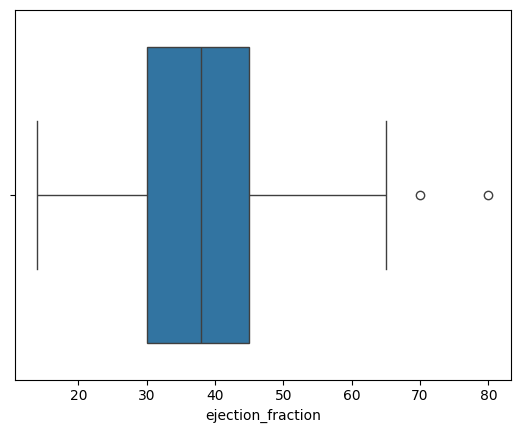

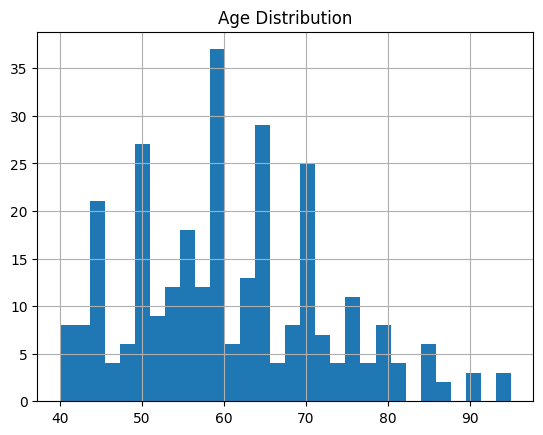

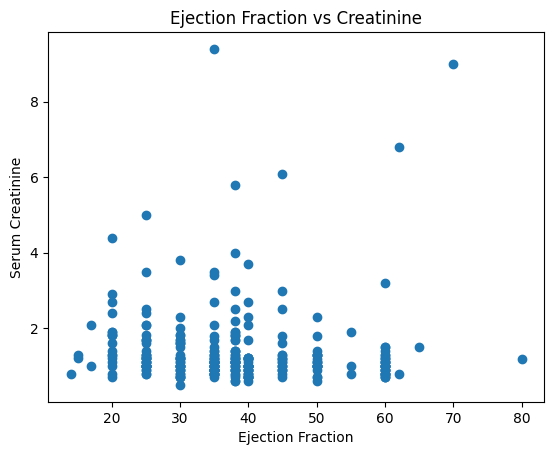

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['ejection_fraction'])
plt.show()

df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()

plt.scatter(df['ejection_fraction'], df['serum_creatinine'])
plt.xlabel("Ejection Fraction")
plt.ylabel("Serum Creatinine")
plt.title("Ejection Fraction vs Creatinine")
plt.show()


In [13]:
import pandas as pd
df = pd.read_csv("credit_scoring_eng.csv")


In [15]:
print(df.shape)
print(df.info())
print(df.describe())


(21525, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None
           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   

In [18]:


df.groupby('debt')['total_income'].mean()


df.groupby('education')['total_income'].mean()

education
ACADEMIC DEGREE        198570.757322
Academic Degree         98752.495442
BACHELOR DEGREE        176496.585093
Bachelor Degree        159188.363670
MASTERS DEGREE         199917.881678
Masters Degree         215199.717592
PRIMARY EDUCATION      153573.262494
Primary Education      110757.228534
SECONDARY EDUCATION    151325.948485
Secondary Education    153693.396573
academic degree        187794.420497
bachelor degree        183172.929778
masters degree         207108.285669
primary education      131968.898948
secondary education    153853.312674
Name: total_income, dtype: float64

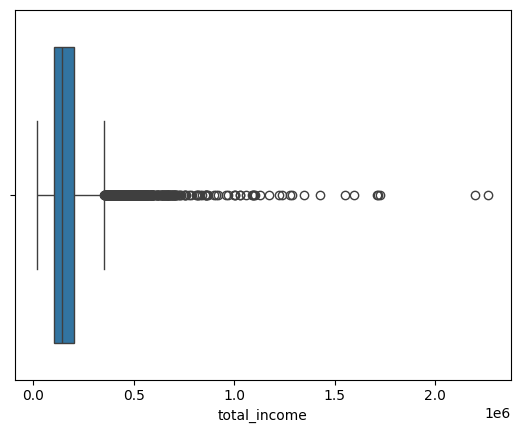

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['total_income'])
plt.show()


In [22]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['total_income']))
df_outliers = df[z_scores > 3]
print(df_outliers.shape)


(0, 12)


In [24]:
Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_income'] < lower_bound) | (df['total_income'] > upper_bound)]
print(outliers.shape)


(818, 12)


In [25]:
df['total_income'] = np.where(df['total_income'] > upper_bound, upper_bound,
                        np.where(df['total_income'] < lower_bound, lower_bound, df['total_income']))


In [26]:
df = df[(df['total_income'] >= lower_bound) & (df['total_income'] <= upper_bound)]


In [27]:
df['total_income'] = np.log1p(df['total_income'])


C:\Users\Irene Divya J\AppData\Local\Temp\ipykernel_20588\3911711549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_income'] = np.log1p(df['total_income'])


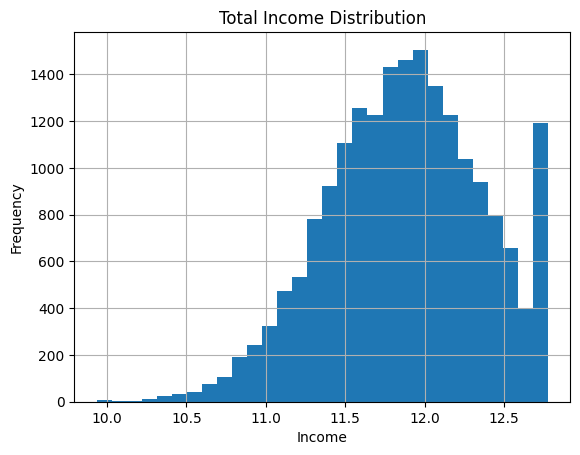

In [31]:
df['total_income'].hist(bins=30)
plt.title("Total Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


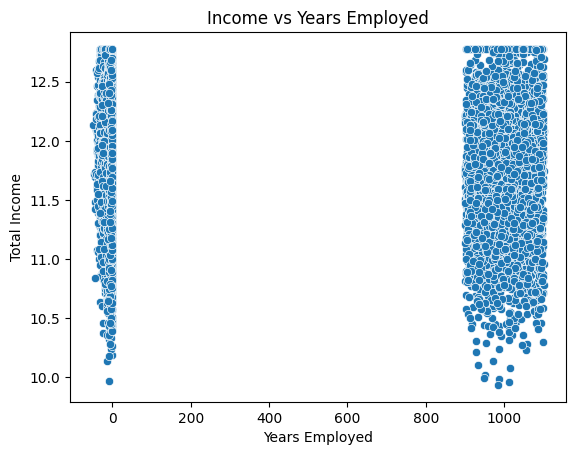

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df['years_employed'] = df['days_employed'] / 365

sns.scatterplot(x='years_employed', y='total_income', data=df)
plt.title("Income vs Years Employed")
plt.xlabel("Years Employed")
plt.ylabel("Total Income")
plt.show()
